In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
import os
for dirname, _, filenames in os.walk('/Kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Sagar kumar\Desktop\ai_job_dataset.csv")

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.shape

(15000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_usd,15000.0,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
remote_ratio,15000.0,49.483333,40.812712,0.0,0.00,50.0,100.0,100.0
years_experience,15000.0,6.253200,5.545768,0.0,2.00,5.0,10.0,19.0
job_description_length,15000.0,1503.314733,576.127083,500.0,1003.75,1512.0,2000.0,2499.0
benefits_score,15000.0,7.504273,1.450870,5.0,6.20,7.5,8.8,10.0


In [7]:
df["posting_date"]=pd.to_datetime(df["posting_date"])
df["application_deadline"]=pd.to_datetime(df["application_deadline"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

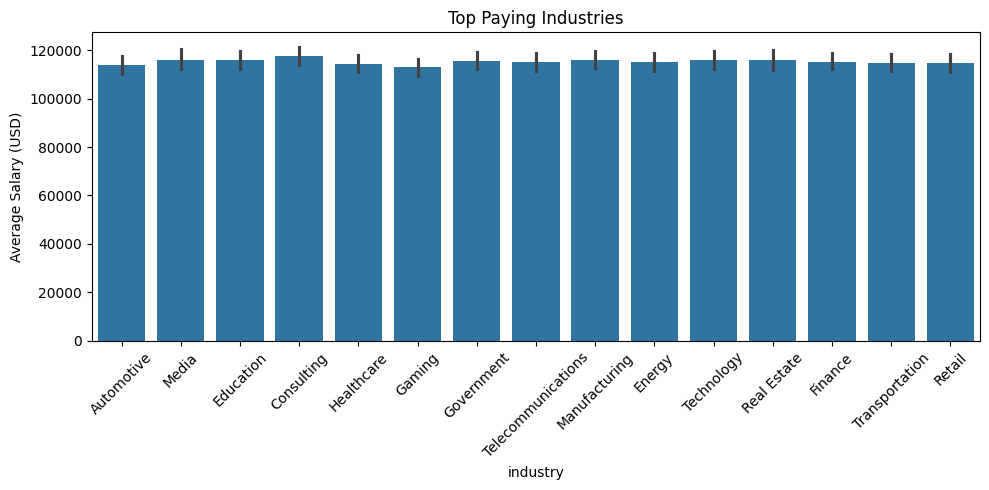

In [9]:
# 1. Top Paying Industries
fig1, ax1 = plt.subplots(figsize =(10,5))
sns.barplot(data = df, x = "industry", y = "salary_usd", estimator = "mean", ax = ax1)
ax1.set_title("Top Paying Industries")
ax1.set_ylabel("Average Salary (USD)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

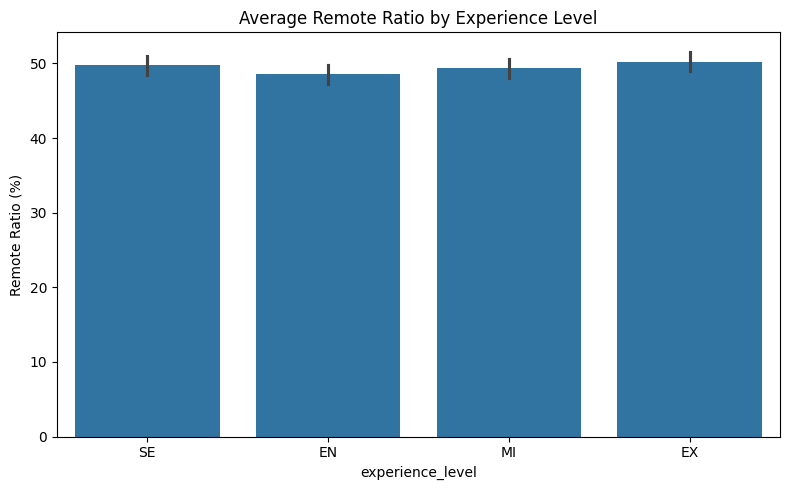

In [10]:
# 2. Remote work trend by experience Level
fig2, ax2 = plt.subplots(figsize = (8,5))
sns.barplot(data = df, x = "experience_level", y = "remote_ratio", estimator="mean", ax=ax2)
ax2.set_title("Average Remote Ratio by Experience Level")
ax2.set_ylabel("Remote Ratio (%)")
plt.tight_layout()
plt.show()

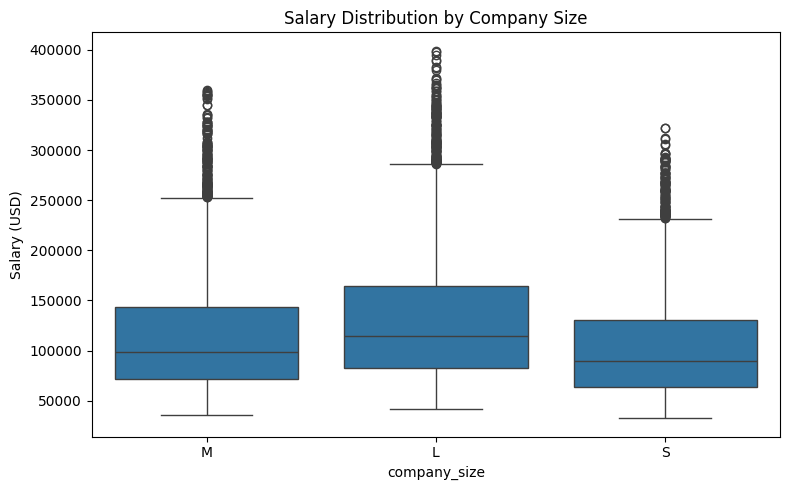

In [11]:
# 3. Company Size vs Salary
fig3, ax3 = plt.subplots(figsize = (8,5))
sns.boxplot(data= df, x="company_size", y="salary_usd", ax=ax3)
ax3.set_title("Salary Distribution by Company Size")
ax3.set_ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

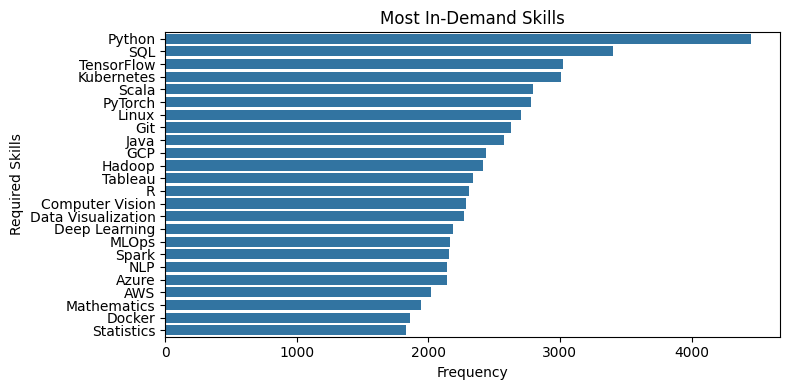

In [12]:
# Most In-Demand Skills
skills_series = df["required_skills"].str.split(", ").explode()
top_skills = skills_series.value_counts()
fig4 ,ax4 = plt.subplots(figsize = (8,4))
sns.barplot(x=top_skills.values, y = top_skills.index, ax = ax4)
ax4.set_title("Most In-Demand Skills")
ax4.set_ylabel("Required Skills")
ax4.set_xlabel("Frequency")
plt.tight_layout()
plt.show()

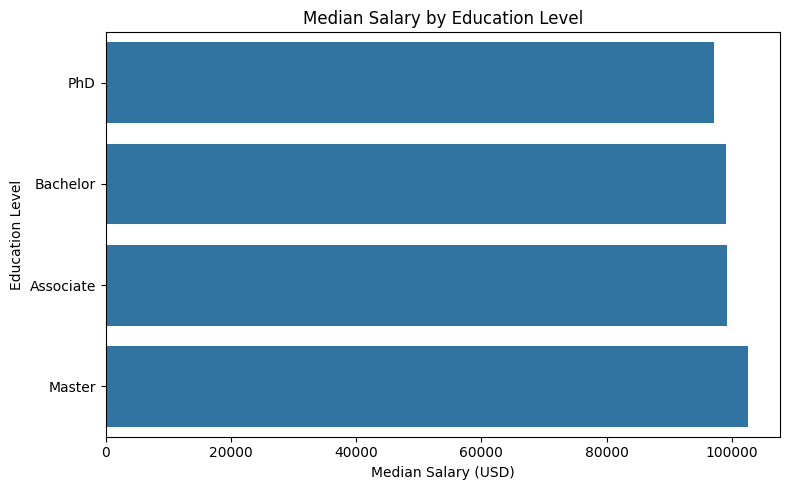

In [13]:
# Education Level vs Salary
fig5 , ax5 = plt.subplots(figsize = (8,5))
edu_salary = df.groupby("education_required")[ "salary_usd"].median().sort_values()
sns.barplot(x=edu_salary.values, y= edu_salary.index, ax=ax5)
ax5.set_title("Median Salary by Education Level")
ax5.set_ylabel("Education Level")
ax5.set_xlabel("Median Salary (USD)")
plt.tight_layout()
plt.show()


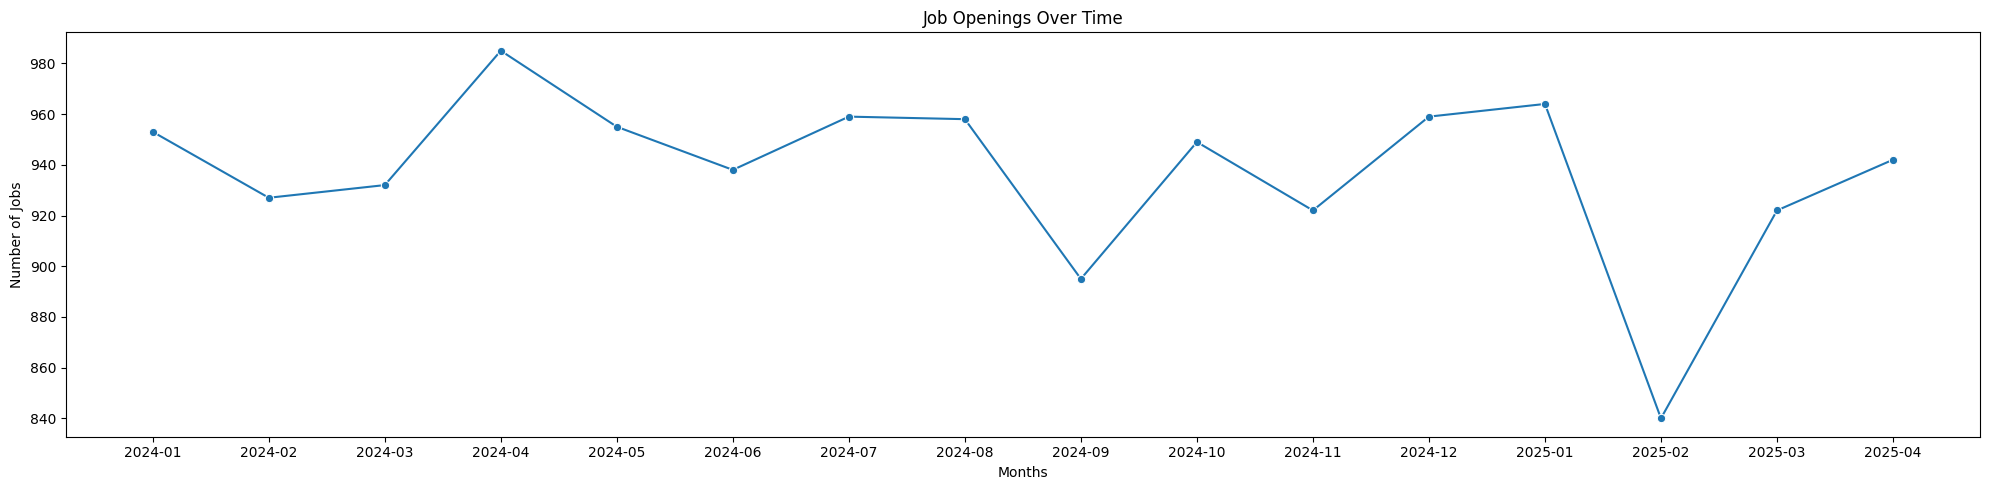

In [14]:
df['month_posted'] = df['posting_date'].dt.to_period('M').astype(str)
fig6, ax6 = plt.subplots(figsize = (20,5))
monthly_count= df['month_posted'].value_counts().sort_index()
sns.lineplot(x=monthly_count.index, y=monthly_count.values,marker = "o", ax=ax6)
ax6.set_title("Job Openings Over Time")
ax6.set_xlabel("Months")
ax6.set_ylabel("Number of Jobs")
plt.tight_layout()
plt.show()

In [15]:
# Group by company and calculate posting stats
company_stats= df.groupby('company_name').agg(
    first_posting = ('posting_date', min),
    last_posting = ('posting_date', max),
    num_of_posting = ('posting_date', 'count')
).reset_index()

In [16]:
company_stats['posting_duration_days']=(company_stats['last_posting'] - company_stats['first_posting']).dt.days

In [17]:
# Add a "growth score" = num_posting posting_duration_days (more posts, less time, = higher score)
company_stats['growth_score'] = company_stats['num_of_posting']/company_stats['posting_duration_days']

In [18]:
#Sort by growth_score descending
company_stats= company_stats.sort_values('growth_score',ascending=False)

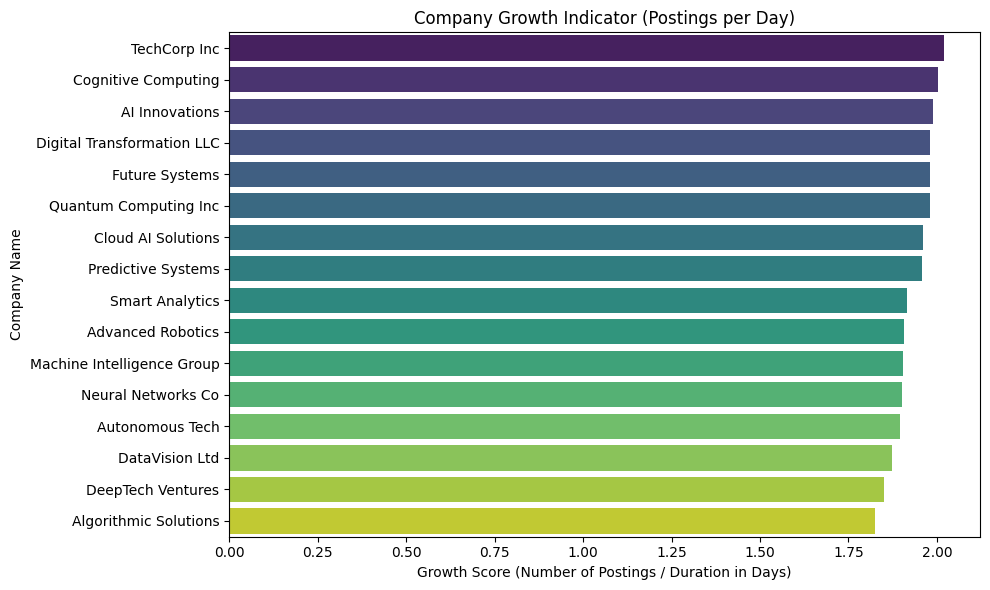

In [19]:
#Plotting
plt.figure(figsize =(10,6))
sns.barplot(x='growth_score', y='company_name', data=company_stats, palette='viridis')
plt.title('Company Growth Indicator (Postings per Day)')
plt.xlabel('Growth Score (Number of Postings / Duration in Days)')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

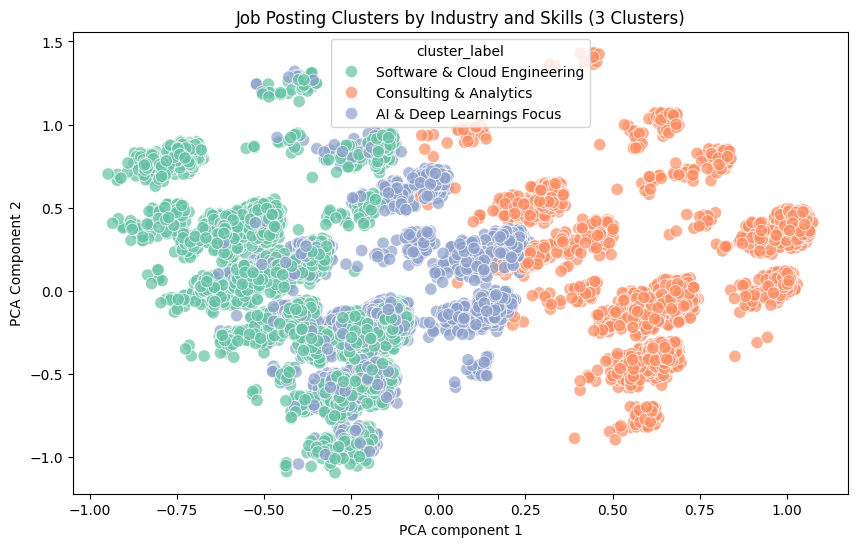

In [33]:
#1. Process skills into list
df['skills_list'] = df['required_skills'].str.split(',').apply(lambda x:[s.strip() for s in x])
                                                                         

# 2. One-hot encode industry
industry_one = pd.get_dummies(df['industry'], prefix = 'indsutry')

#3. MultiLabelBinarizer for skills
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(df['skills_list']), columns = mlb.classes_, index = df.index)

#4. Combine Industry and skills features
X = pd.concat([industry_one, skills_encoded], axis =1)

#5. Cluster with KMeans into 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
df['cluster'] = kmeans.fit_predict(X)

#6. Analyze clusters to assign meaningful names
cluster_summarizes = {}

for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]
    top_industries= cluster_data['industry'].value_counts().head(3).index.tolist()
    cluster_summarizes[cluster_num] ={
        'top_industries': top_industries,
        'top_skills': cluster_data['skills_list'].explode().value_counts().head(5).index.tolist()
    }

#Example naming based on top industries and skills (customize these)
cluster_name = {
    0: "AI & Deep Learnings Focus",
    1: "Software & Cloud Engineering",
    2: "Consulting & Analytics"
}

#Add descriptive cluster label column 
df['cluster_label'] = df['cluster'].map(cluster_name)

#7. PCA for 2D visualization
pca = PCA(n_components =2 , random_state =42)
X_pca = pca.fit_transform(X)

#Plot clusters with descriptive names
plt.figure(figsize = (10,6))
palette = sns.color_palette('Set2', 3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_label'], palette = palette, s= 80, alpha=0.7)
plt.title('Job Posting Clusters by Industry and Skills (3 Clusters)')
plt.xlabel('PCA component 1')
plt.ylabel('PCA Component 2')
plt.show()




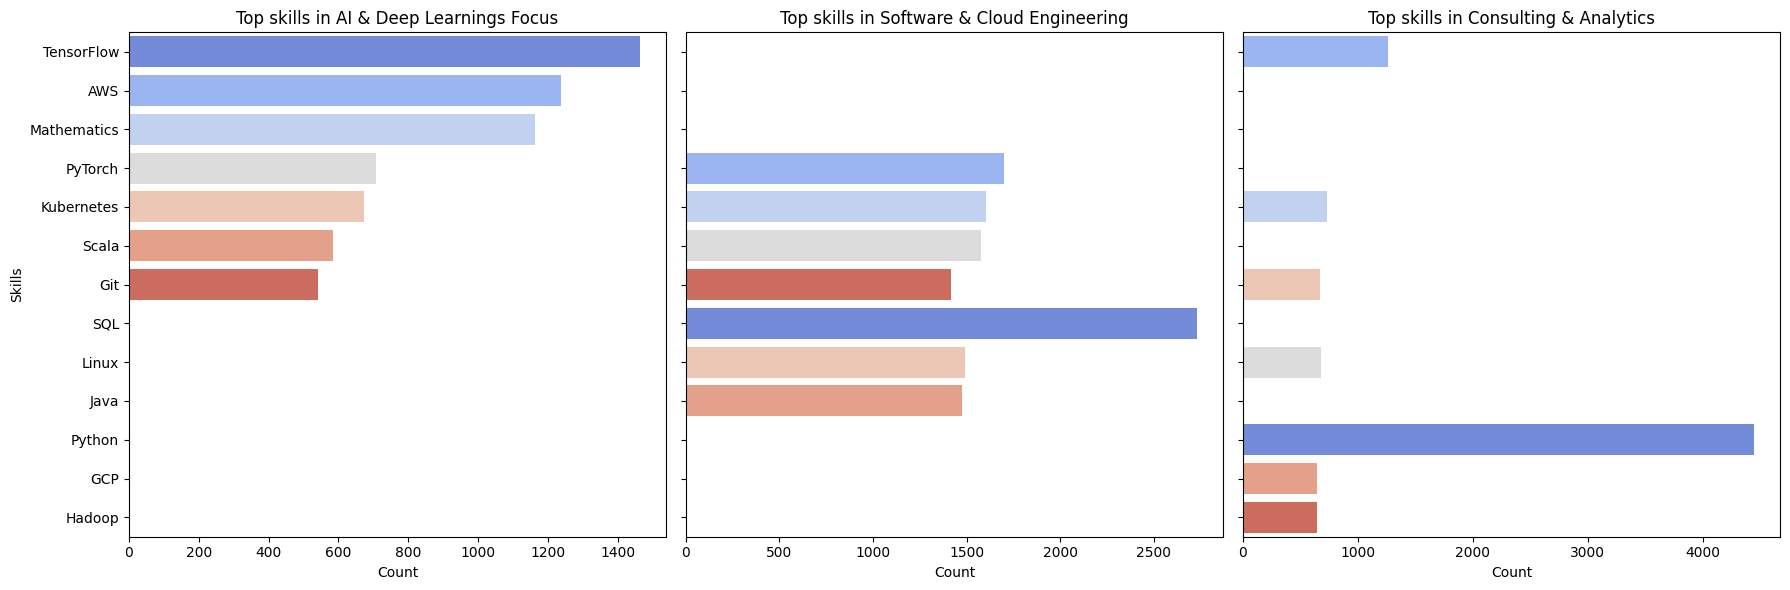

In [36]:
# Plot top skills per cluster with labels
fig, axes = plt.subplots(1, 3, figsize = (18,6), sharey = True)

for cluster_num in range(3):
    cluster_skills = df[df['cluster'] == cluster_num]['skills_list'].explode()
    top_skills = cluster_skills.value_counts().head(7)

    sns.barplot(y=top_skills.index, x=top_skills.values, ax=axes[cluster_num], palette ='coolwarm')
    axes[cluster_num].set_title(f'Top skills in {cluster_name[cluster_num]}')
    axes[cluster_num].set_xlabel('Count')
    if cluster_num == 0:
        axes[cluster_num].set_ylabel('Skills')
    else:
        axes[cluster_num].set_ylabel('')

plt.tight_layout()
plt.show()
    

In [39]:
#Print cluster summary for your reference
for cluster_num, summary in cluster_summarizes.items():
    print(f"\ncluster {cluster_num} ({cluster_name[cluster_num]}):")
    print(f"Top Industries: {summary['top_industries']}")
    print(f"Top Skills: {summary['top_skills']}")


cluster 0 (AI & Deep Learnings Focus):
Top Industries: ['Government', 'Media', 'Finance']
Top Skills: ['TensorFlow', 'AWS', 'Mathematics', 'PyTorch', 'Kubernetes']

cluster 1 (Software & Cloud Engineering):
Top Industries: ['Retail', 'Consulting', 'Technology']
Top Skills: ['SQL', 'PyTorch', 'Kubernetes', 'Scala', 'Linux']

cluster 2 (Consulting & Analytics):
Top Industries: ['Real Estate', 'Technology', 'Retail']
Top Skills: ['Python', 'TensorFlow', 'Kubernetes', 'Linux', 'Git']
